<a href="https://colab.research.google.com/github/ShotaArima/kaggle/blob/main/books/Kaggle%E3%81%A7%E5%8B%9D%E3%81%A4%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E6%8A%80%E8%A1%93/03-evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 評価指標
ここでは、評価指標についてまとめていく  
文献 : "Kaggleで勝つデータ分析の技術" 技術評論社

In [1]:
# ライブラリのインポート
import numpy as np

## RMSE (Root Mean Squared Error)
$$
\mathrm{RMSE} = \sqrt{\cfrac{1}{N}\sum^{n}_{i=1}(y_i-\hat{y}_i)^2}
$$

In [2]:
from sklearn.metrics import mean_squared_error

# y_tureが真の値、y_predが予測値
y_true = [100, 160, 60]
y_pred = [80, 100, 100]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

43.20493798938573


## RMSLE (Root Mean Squared Logarithmic Error)
$$
\mathrm{RMSLE} = \sqrt{\cfrac{1}{N}\sum^{N}_{i=1}((\log{(1+y_i)})-\log{(1+\hat{y_i})})^2}
$$

In [3]:
from sklearn.metrics import mean_squared_log_error

# y_tureが真の値、y_predが予測値
y_true = [100, 0, 400]
y_pred = [200, 10, 200]

rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
print(rmsle)

1.4944905400842203


## MAE (Mean Absolute Error)
$$
\mathrm{MAE} = \cfrac{1}{N}\sum^{N}_{i=1}|y_i-\hat{y_i}|
$$

In [4]:
from sklearn.metrics import mean_absolute_error

# y_tureが真の値、y_predが予測値
y_true = [100, 160, 60]
y_pred = [80, 100, 100]

mae = mean_absolute_error(y_true, y_pred)
print(mae)

40.0


## 決定係数 ($\mathrm{R^2}$)
$$
\mathrm{R}^2=1-\cfrac{\sum^{N}_{i=1}(y_i-\hat{y_i})^2}{y_i-\bar{y}} \\
\bar{y}=\cfrac{1}{N}\sum^{N}_{i=1}y_i
$$

In [5]:
from sklearn.metrics import r2_score

# y_tureが真の値、y_predが予測値
y_true = [100, 160, 60]
y_pred = [80, 100, 100]

r = r2_score(y_true, y_pred)
print(r)

-0.10526315789473695


# 二値分類における評価指標
正例か負例かを予測値とする場合

In [6]:
from sklearn.metrics import confusion_matrix

# 0,1で表現される二値分類の真の値と予測値
y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

tp = np.sum((np.array(y_true)==1)&(np.array(y_pred)==1))
tn = np.sum((np.array(y_true)==1)&(np.array(y_pred)==0))
fp = np.sum((np.array(y_true)==0)&(np.array(y_pred)==1))
fn = np.sum((np.array(y_true)==0)&(np.array(y_pred)==0))

confusion_matrix1 = np.array([[tp, fp], [fn, tn]])

print(confusion_matrix1)

# scikit-learnのmetricsモジュールのconfusion_matrixでも作成できるが、
# 混合行列の要素の配置が違うので注意が必要
confusion_matrix2 = confusion_matrix(y_true, y_pred)
print(confusion_matrix2)

[[3 1]
 [2 2]]
[[2 1]
 [2 3]]


## accurasy

$$
\mathrm{accuracy}=\cfrac{TP+TN}{TP+TN+FP+FN}
$$

In [7]:
from sklearn.metrics import accuracy_score

# 0,1で表される二値分類の真の値と予測値
y_true = [1, 0, 1, 1, 0, 1, 1, 0 ]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1 ]

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.625


## precision(適合率)とrecall(再現率)
- precision : 正例と予測したもののうち、真の値も正例の割合
    
$$
\mathrm{precision} = \cfrac{TP}{TP+FP}
$$
    
- recall : 真の値が正例のもののうち、その程度を正例の予測として含めることができているのか
    
$$
\mathrm{recall}=\cfrac{TP}{TP+FN}
$$

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 0,1で表される二値分類の真の値と予測値
y_true = [1, 0, 1, 1, 0, 1, 1, 0 ]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1 ]

precision = precision_score(y_true, y_pred)
print(f"precision",precision)
recall = recall_score(y_true, y_pred)
print(f"recall",recall)

precision 0.75
recall 0.6


## F1-scoreとF$\beta$-score
- F1-score
    - precisionとrecallの調和平均で計算される指標
    - precisionとrecallのトレードオフの関係のものをバランスよくした
    - F値とも言われている
        
        $$
        \mathrm{F_1}=\cfrac{2}{\frac{1}{\mathrm{recall}}+\frac{1}{\mathrm{precision}}}=\cfrac{2 \cdot \mathrm{recall}\cdot \mathrm{precision}}{\mathrm{recall+\mathrm{precision}}}=\cfrac{2TP}{2TP+FP+FN}
        $$
        
- F$\beta$-socre
    - F1-scoreからrecallとprecisionのバランスをrecallに比べてそれだけ重視するのかを係数$\beta$によって調整した指標
        
        $$
        \mathrm{F_{\beta}}=\cfrac{(1+\beta^2)}{\frac{\beta^2}{\mathrm{recall}}+\frac{1}{\mathrm{precision}}}=\cfrac{(1+\beta^2) \cdot \mathrm{recall}\cdot \mathrm{precision}}{\mathrm{recall+\beta^2\mathrm{precision}}}
        $$
        

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

# 0,1で表される二値分類の真の値と予測値
y_true = [1, 0, 1, 1, 0, 1, 1, 0 ]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1 ]

f1 = f1_score(y_true, y_pred)
print(f"f1",f1)
f_beta1 = fbeta_score(y_true, y_pred, beta=1)
print(f"f_beta(beta=1)",f_beta1)
f_beta2 = fbeta_score(y_true, y_pred, beta=2)
print(f"f_beta(beta=2)",f_beta2)

f1 0.6666666666666666
f_beta(beta=1) 0.6666666666666666
f_beta(beta=2) 0.625


## logloss
$$
\mathrm{logloss}=-\cfrac{1}{N}\sum^{N}_{i=1}(y_i\log{p_i}+(1-y_i)\log{(1-p_i)})=-\cfrac{1}{N}\sum^{N}_{i=1}\log{p_i'}
$$

In [4]:
from sklearn.metrics import log_loss

# 0,1で表される二値分類の真の値と予測確率
y_true = [1, 0, 1, 1, 0, 1]
y_prob = [0.1, 0.2, 0.8, 0.8, 0.1, 0.3]

logloss = log_loss(y_true, y_prob)
print(logloss)

0.7135581778200728


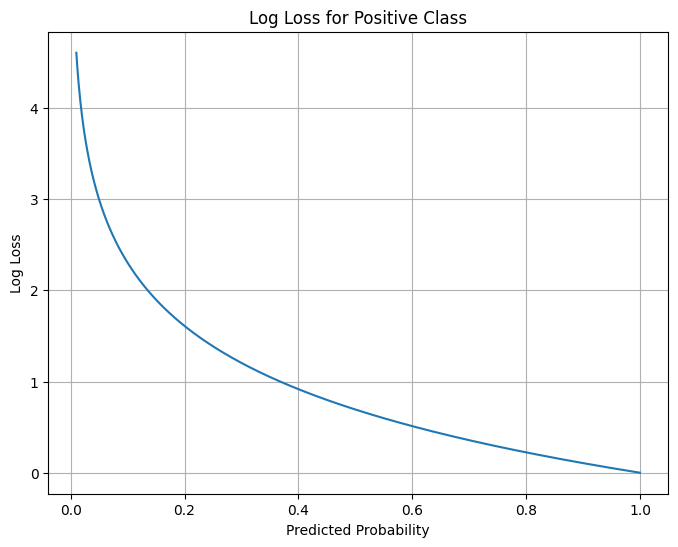

In [17]:
from matplotlib import pyplot as plt
import numpy as np

# 0を除外し、小さな値から始める（log(0)を避けるため）
p = np.linspace(0.01, 1.0, 1000)
# NumPyのlog関数を使用し、配列演算を行う
l = -1 * np.log(p)

plt.figure(figsize=(8, 6))
plt.plot(p, l)
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss for Positive Class')
plt.grid(True)
plt.show()

<ipython-input-18-aec33a746b2d>:4: RuntimeWarning: divide by zero encountered in log
  l = -1 * np.log(1-p)


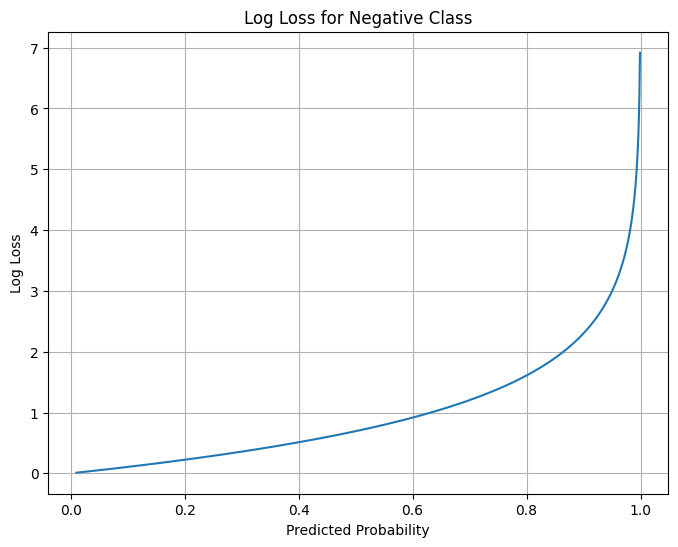

In [18]:
# 0を除外し、小さな値から始める（log(0)を避けるため）
p = np.linspace(0.01, 1.0, 1000)
# NumPyのlog関数を使用し、配列演算を行う
l = -1 * np.log(1-p)

plt.figure(figsize=(8, 6))
plt.plot(p, l)
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss for Negative Class')
plt.grid(True)
plt.show()